In [1]:
import pandas as pd

In [2]:
m=pd.read_csv("csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
m

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,57226,57657,58158,58838,59422,60065,60784,61514,62167,63031
265,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2067,2070,2070,2071,2071,2071,2071,2072,2072,2072
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,16819,16908,16954,16971,16997,17036,17056,17093,17097,17123


In [3]:
def getByCountry(m,n_country,rus_country):
    t=pd.DataFrame(list(zip(m.columns[4:],list(m.iterrows())[n_country][1][4:])))
    t.columns=("Дата",rus_country)
    t=t.set_index("Дата")
    return t


In [4]:
nas={"Всего":7817410000,"Россия":146550000,"США":329210630,"Германия":83149300,"Великобритания":66993318}

In [5]:
def getForEarth(m):
    tm=[]
    for i in m.columns[4:]:
        tm.append((i,m[i].sum()))
    tm=pd.DataFrame(tm)
    tm.columns=("Дата","Всего")
    tm=tm.set_index("Дата")
    return tm


In [6]:
def setPercentage(m,nas):
    for i in m:
        m[i+"%"]=[i2/nas[i]*100 for i2 in m[i]]

In [7]:
def getKurs(m):
    tm=pd.read_csv("kurs.csv")
    tm["Дата"]=tm["Дата"].map(lambda z:str(int(z.split(".")[1]))+"/"+str(int(z.split(".")[0]))+"/"+z.split(".")[2][2:])
    tm=tm.set_index("Дата")
    m["Доллар США"]=tm["Доллар США"]
    m["Евро"]=tm["Евро"]

In [8]:
def fixKurs(m,v):
    kvo=0
    while True:
        tv=m[v].shift(1)
        nv=list()
        for i,z in enumerate(m[v]):
            if str(z)=="nan":
                nv.append(tv[i])
                kvo+=1
            else:
                nv.append(m[v][i])
        m[v]=nv
        if kvo==0:
            break
        else:
            kvo=0

In [9]:
import time

In [10]:
%%timeit
t=getByCountry(m,209,"Россия")
t["США"]=getByCountry(m,244,"США")
t["Германия"]=getByCountry(m,130,"Германия")
t["Великобритания"]=getByCountry(m,258,"Великобритания")
t["Всего"]=getForEarth(m)
setPercentage(t,nas)
getKurs(t)
fixKurs(t,"Доллар США")
fixKurs(t,"Евро")
t["Доллар/Евро"]=t["Доллар США"]/t["Евро"]
t["Евро/Доллар"]=t["Евро"]/t["Доллар США"]
t

198 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
time_start=time.time()
t=getByCountry(m,209,"Россия")
t["США"]=getByCountry(m,244,"США")
t["Германия"]=getByCountry(m,130,"Германия")
t["Великобритания"]=getByCountry(m,258,"Великобритания")
print(time.time()-time_start)
t["Всего"]=getForEarth(m)
setPercentage(t,nas)
getKurs(t)
fixKurs(t,"Доллар США")
fixKurs(t,"Евро")
t["Доллар/Евро"]=t["Доллар США"]/t["Евро"]
t["Евро/Доллар"]=t["Евро"]/t["Доллар США"]
t

0.11210823059082031


,Россия,США,Германия,Великобритания,Всего,Россия%,США%,Германия%,Великобритания%,Всего%,Доллар США,Евро,Доллар/Евро,Евро/Доллар
Дата,,,,,,,,,,,,,,
1/22/20,0,1,0,0,555,0.000000,3.037569e-07,0.000000,0.000000,0.000007,61.8552,68.6222,0.901388,1.109401
1/23/20,0,1,0,0,654,0.000000,3.037569e-07,0.000000,0.000000,0.000008,61.8343,68.5186,0.902445,1.108100
1/24/20,0,2,0,0,941,0.000000,6.075138e-07,0.000000,0.000000,0.000012,61.9515,68.6856,0.901958,1.108700
1/25/20,0,2,0,0,1434,0.000000,6.075138e-07,0.000000,0.000000,0.000018,61.8031,68.2924,0.904978,1.105000
1/26/20,0,5,0,0,2118,0.000000,1.518784e-06,0.000000,0.000000,0.000027,61.8031,68.2924,0.904978,1.105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/11/20,1822345,10399325,738094,1256725,52126793,1.243497,3.158867e+00,0.887673,1.875896,0.666804,76.3978,90.3557,0.845523,1.182700
11/12/20,1843678,10560111,762832,1290195,52740580,1.258054,3.207707e+00,0.917424,1.925856,0.674655,76.2075,90.0468,0.846310,1.181600
11/13/20,1865395,10737335,785093,1317496,53365400,1.272873,3.261540e+00,0.944197,1.966608,0.682648,77.1148,90.8104,0.849185,1.177600


In [12]:
from threading import Thread
class threadCountry(Thread):
    def __init__(self,m,n_country,rus_country,t):
        Thread.__init__(self)
        self.m=m
        self.n_country=n_country
        self.rus_country=rus_country
        self.t=t
    def run(self):
        tt=pd.DataFrame(list(zip(self.m.columns[4:],list(self.m.iterrows())[self.n_country][1][4:])))
        tt.columns=("Дата",self.rus_country)
        tt=tt.set_index("Дата")
        self.t[self.rus_country]=tt[self.rus_country]

In [13]:
%%timeit
t2=pd.DataFrame()
potoki=[]
for i in [("Россия",209),("США",244),("Германия",130),("Великобритания",258)]:
    potoki.append(threadCountry(m,i[1],i[0],t2))
    potoki[-1].start()
for i in potoki:
    i.join()
t2["Всего"]=getForEarth(m)
setPercentage(t2,nas)
getKurs(t2)
fixKurs(t2,"Доллар США")
fixKurs(t2,"Евро")
t2["Доллар/Евро"]=t["Доллар США"]/t2["Евро"]
t2["Евро/Доллар"]=t["Евро"]/t2["Доллар США"]
t2

202 ms ± 6.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
time_start=time.time()
t2=pd.DataFrame()
potoki=[]
for i in [("Россия",209),("США",244),("Германия",130),("Великобритания",258)]:
    potoki.append(threadCountry(m,i[1],i[0],t2))
    potoki[-1].start()
for i in potoki:
    i.join()
print(time.time()-time_start)
t2["Всего"]=getForEarth(m)
setPercentage(t2,nas)
getKurs(t2)
fixKurs(t2,"Доллар США")
fixKurs(t2,"Евро")
t2["Доллар/Евро"]=t["Доллар США"]/t2["Евро"]
t2["Евро/Доллар"]=t["Евро"]/t2["Доллар США"]
t2

0.10009503364562988


,США,Россия,Германия,Великобритания,Всего,США%,Россия%,Германия%,Великобритания%,Всего%,Доллар США,Евро,Доллар/Евро,Евро/Доллар
Дата,,,,,,,,,,,,,,
1/22/20,1,0,0,0,555,3.037569e-07,0.000000,0.000000,0.000000,0.000007,61.8552,68.6222,0.901388,1.109401
1/23/20,1,0,0,0,654,3.037569e-07,0.000000,0.000000,0.000000,0.000008,61.8343,68.5186,0.902445,1.108100
1/24/20,2,0,0,0,941,6.075138e-07,0.000000,0.000000,0.000000,0.000012,61.9515,68.6856,0.901958,1.108700
1/25/20,2,0,0,0,1434,6.075138e-07,0.000000,0.000000,0.000000,0.000018,61.8031,68.2924,0.904978,1.105000
1/26/20,5,0,0,0,2118,1.518784e-06,0.000000,0.000000,0.000000,0.000027,61.8031,68.2924,0.904978,1.105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/11/20,10399325,1822345,738094,1256725,52126793,3.158867e+00,1.243497,0.887673,1.875896,0.666804,76.3978,90.3557,0.845523,1.182700
11/12/20,10560111,1843678,762832,1290195,52740580,3.207707e+00,1.258054,0.917424,1.925856,0.674655,76.2075,90.0468,0.846310,1.181600
11/13/20,10737335,1865395,785093,1317496,53365400,3.261540e+00,1.272873,0.944197,1.966608,0.682648,77.1148,90.8104,0.849185,1.177600


In [15]:
t.corr()

,Россия,США,Германия,Великобритания,Всего,Россия%,США%,Германия%,Великобритания%,Всего%,Доллар США,Евро,Доллар/Евро,Евро/Доллар
Россия,1.000000,0.989528,0.913293,0.919619,0.979168,1.000000,0.989528,0.913293,0.919619,0.979168,0.559986,0.789026,-0.876629,0.878016
США,0.989528,1.000000,0.906116,0.909251,0.993401,0.989528,1.000000,0.906116,0.909251,0.993401,0.608068,0.826695,-0.877269,0.880816
Германия,0.913293,0.906116,1.000000,0.984016,0.912374,0.913293,0.906116,1.000000,0.984016,0.912374,0.617842,0.744326,-0.667008,0.669802
Великобритания,0.919619,0.909251,0.984016,1.000000,0.928289,0.919619,0.909251,0.984016,1.000000,0.928289,0.565037,0.707129,-0.668618,0.670621
Всего,0.979168,0.993401,0.912374,0.928289,1.000000,0.979168,0.993401,0.912374,0.928289,1.000000,0.607428,0.814048,-0.845495,0.849006
Россия%,1.000000,0.989528,0.913293,0.919619,0.979168,1.000000,0.989528,0.913293,0.919619,0.979168,0.559986,0.789026,-0.876629,0.878016
США%,0.989528,1.000000,0.906116,0.909251,0.993401,0.989528,1.000000,0.906116,0.909251,0.993401,0.608068,0.826695,-0.877269,0.880816
Германия%,0.913293,0.906116,1.000000,0.984016,0.912374,0.913293,0.906116,1.000000,0.984016,0.912374,0.617842,0.744326,-0.667008,0.669802
Великобритания%,0.919619,0.909251,0.984016,1.000000,0.928289,0.919619,0.909251,0.984016,1.000000,0.928289,0.565037,0.707129,-0.668618,0.670621
Всего%,0.979168,0.993401,0.912374,0.928289,1.000000,0.979168,0.993401,0.912374,0.928289,1.000000,0.607428,0.814048,-0.845495,0.849006


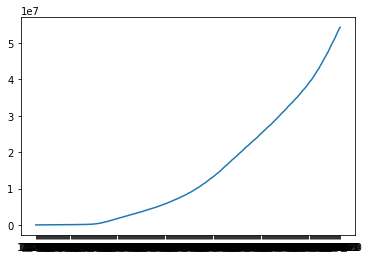

In [33]:
import matplotlib.pyplot as plt
plt.plot(t.index, t['Всего'])

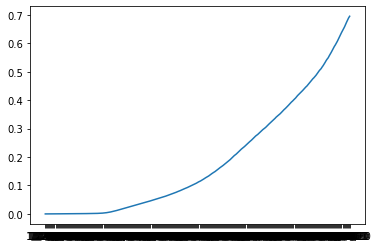

In [34]:
import matplotlib.pyplot as plt
plt.plot(t.index, t['Всего%'])

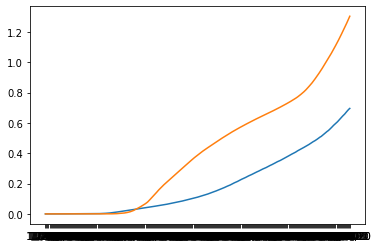

In [35]:
import matplotlib.pyplot as plt
plt.plot(t.index, t['Всего%'],t['Россия%'])

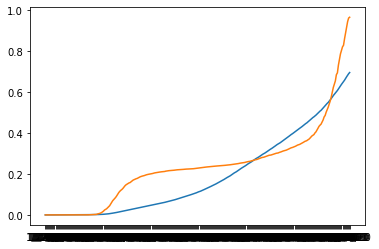

In [36]:
import matplotlib.pyplot as plt
plt.plot(t.index, t['Всего%'],t['Германия%'])

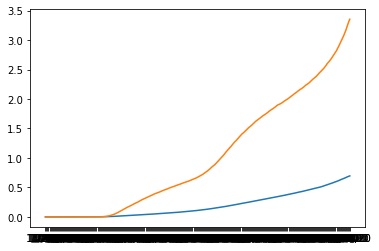

In [37]:
import matplotlib.pyplot as plt
plt.plot(t.index, t['Всего%'],t['США%'])

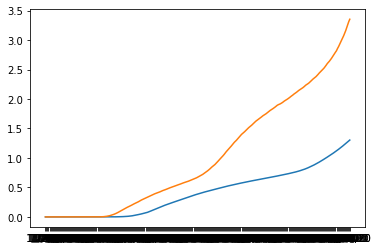

In [38]:
import matplotlib.pyplot as plt
plt.plot(t.index, t['Россия%'],t['США%'])

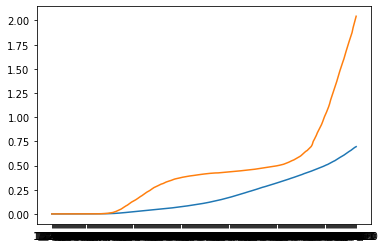

In [39]:
import matplotlib.pyplot as plt
plt.plot(t.index, t['Всего%'],t['Великобритания%'])

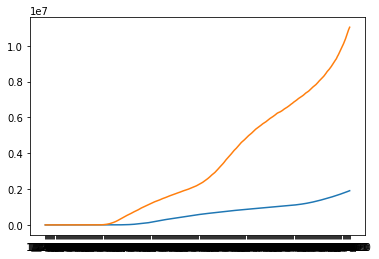

In [40]:
import matplotlib.pyplot as plt
plt.plot(t.index, t['Россия'],t['США'])

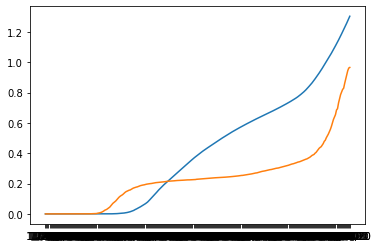

In [41]:
import matplotlib.pyplot as plt
plt.plot(t.index, t['Россия%'],t["Германия%"])

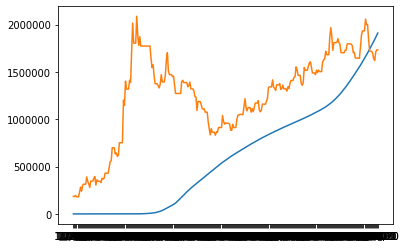

In [42]:
import matplotlib.pyplot as plt

plt.plot(t.index, t['Россия'],(t['Доллар США']-60)*100000)

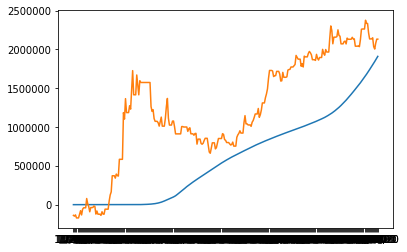

In [43]:
plt.plot(t.index, t['Россия'],(t['Евро']-70)*100000)

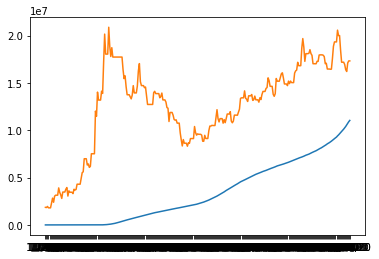

In [44]:
plt.plot(t.index, t['США'],(t['Доллар США']-60)*1000000)

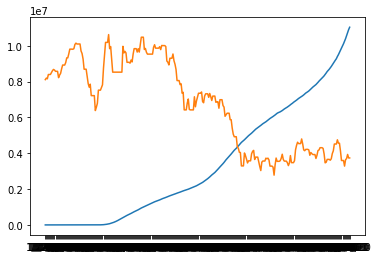

In [45]:
plt.plot(t.index, t['США'],(t['Доллар/Евро']-0.8)*80000000)

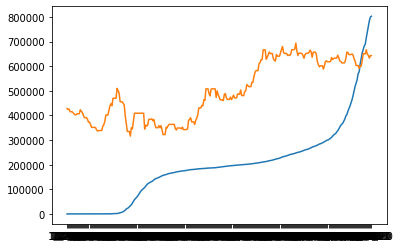

In [46]:
plt.plot(t.index, t['Германия'],(t['Евро/Доллар']-0.9)*3000000-200000)

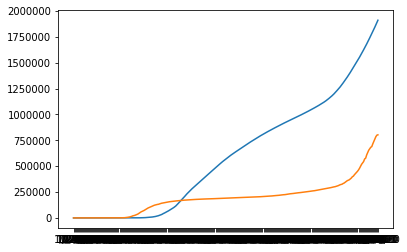

In [47]:
plt.plot(t.index, t['Россия'],t["Германия"])

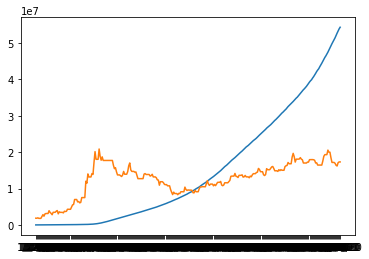

In [48]:
plt.plot(t.index, t['Всего'],(t['Доллар США']-60)*1000000)

In [53]:
import pyarrow.parquet as pq
import pyarrow as pa
import os
import time

In [58]:
start=time.time()
t.to_csv("1.csv")
print(os.path.getsize("1.csv"))
print(time.time()-start)

58337
0.008007526397705078


In [84]:
%%time
pd.read_csv("1.csv")[["Россия"]]

Wall time: 4 ms


,Россия
0,0
1,0
2,0
3,0
4,0
...,...
294,1822345
295,1843678
296,1865395
297,1887836


In [86]:
pt=pa.Table.from_pandas(t)

In [59]:
start=time.time()
pq.write_table(pt, '1.parquet')
print(os.path.getsize("1.parquet"))
print(time.time()-start)

44471
0.003019571304321289


In [85]:
t.to_parquet('2.parquet',compression="gzip")
print(os.path.getsize("2.parquet"))

40386


In [79]:
%%time
pq.read_pandas('1.parquet', columns=['Россия']).to_pandas()

Wall time: 5 ms


,Россия
Дата,
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
11/11/20,1822345
11/12/20,1843678
11/13/20,1865395


In [77]:
%%time
pq.read_pandas('1.parquet', columns=['Россия',"США"]).to_pandas()

Wall time: 7.01 ms


,Россия,США
Дата,,
1/22/20,0,1
1/23/20,0,1
1/24/20,0,2
1/25/20,0,2
1/26/20,0,5
...,...,...
11/11/20,1822345,10399325
11/12/20,1843678,10560111
11/13/20,1865395,10737335
